### Train model

In [64]:
# Import libraries.
using Flux, Plots, Random, PlotThemes, Statistics, BayesLaplace
theme(:juno)
# Number of points to generate.
xs, y = toy_data_non_linear(200)
X = hcat(xs...); # bring into tabular format
data = zip(xs,y);

# Neural network:
n_hidden = 32
D = size(X)[1]
nn = Chain(
    Dense(D, n_hidden, σ),
    Dense(n_hidden, 1)
)  
λ = 0.01
sqnorm(x) = sum(abs2, x)
weight_regularization(λ=λ) = 1/2 * λ^2 * sum(sqnorm, Flux.params(nn))
loss(x, y) = Flux.Losses.logitbinarycrossentropy(nn(x), y) + weight_regularization()

# Training:
using Flux.Optimise: update!, ADAM
opt = ADAM()
epochs = 200
for epoch = 1:epochs
  for d in data
    gs = gradient(params(nn)) do
      l = loss(d...)
    end
    update!(opt, params(nn), gs)
  end
end

### Chart

In [65]:
Random.seed!(123)
shuffled_indices = randperm(200)
data = zip(xs[shuffled_indices], y[shuffled_indices]);

zip([[1.8437642525453533, 3.4891691787551773], [3.859817272108142, -0.5043587620802885], [0.8553657365094933, -3.5141578031074525], [3.0480683742778365, 1.673218518476935], [1.802195655034934, -3.242779298668837], [-3.126752672566965, 3.6902561759673014], [-3.260235088924655, 2.314744416889924], [4.799402548708947, -3.7205031844063927], [4.054566571776309, 0.9468462180146588], [-2.2435079048479403, -4.6340305085637254]  …  [-3.6731142950785203, -4.24362249951367], [1.1772852235216607, 0.8953691302603739], [-2.3050897423564836, -1.9531439176270622], [-1.1798284185620287, -2.7732924648341744], [2.006710033050761, -4.219853667491881], [-2.712364543009313, -1.9842166114892543], [4.437933191533014, 4.2546274974860285], [3.642599777239619, 2.0203928813402037], [-3.2780738268381158, 1.0615529452824097], [2.4752253169895972, 1.1194624096814998]], [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0])

In [ ]:
xlim = (minimum(X[:,1]),maximum(X[:,1]))
ylim = (minimum(X[:,2]),maximum(X[:,2]))
anim = Animation()
for N in 1:1:length(data)
    la = laplace(nn, λ=λ, subset_of_weights=:last_layer)
    fit!(la, Iterators.take(data,N))
    X = reduce(vcat,map(d -> reshape(d[1],1,length(d[1])),Iterators.take(data, N)))
    y = map(d -> d[2],Iterators.take(data, N))
    plt = plot_contour(X,y,la;xlim=xlim,ylim=ylim,zoom=-2,clegend=false)
    plt = plot(plt, axis=nothing,background_color=:transparent, size=(500,500))
    frame(anim, plt)
end

┌ Info: Saved animation to 
│   fn = /Users/FA31DU/Library/CloudStorage/OneDrive-DelftUniversityofTechnology/git/BayesLaplace.jl/docs/src/www/anim.gif
└ @ Plots /Users/FA31DU/.julia/packages/Plots/8ouqB/src/animation.jl:114


Plots.AnimatedGif("/Users/FA31DU/Library/CloudStorage/OneDrive-DelftUniversityofTechnology/git/BayesLaplace.jl/docs/src/www/anim.gif")
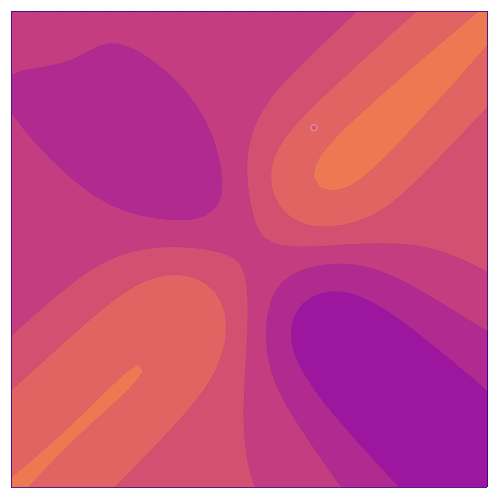

In [91]:
gif(anim, "www/anim.gif", fps=50)